# Part II - Impact of User Demographics and Time on Bike Trips - Ford GoBike System

## by Bashar Hammouri

## Investigation Overview

The main goal of this presentation is to explore the Ford GoBike system data and highlight the key insights into the bike-sharing system, through identifying who uses the service, when they use it and how they use it. This will provide data-driven insights that will help in improving the service efficiency and enhancing the user experience.

To obtain this, the main focus was on the trip duration (`duration_min`), user type (`user_type`), gender (`member_gender`), age (`member_age`) and trip start time (`start_time`).


## Dataset Overview and Executive Summary

The dataset consisted of **16** attributes for more than **183k** bike trips in the Ford GoBike trip data from February 2019. The user age `member_age` was extracted from `member_birth_date`, and the `duration_min` was calculated from the `duration_sec`, also the `start_hour` and `start_day` were extracted from the `start_time` variable. After cleaning the data by removing inconsistencies and missing values, a new cleaned dataset consists of **19** attributes and almost **175k** records for bike trips will be used in this part.

The key findings were:
* Most trips were very short, but in general, casual 'Customers' have slightly longer trips than 'Subscribers'.
* The bike-sharing service is busiest during weekdays, especially from 'Monday' to 'Thursday' with morning and evening rush hours based on the commutes.
* The majority of trips were made by 'Subscribers' user type and 'Male' gender, where most of their trips were short and functional trips, and their age were usually between **20s** and **40s**.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
cleaned_bike_df = pd.read_csv('cleaned-fordgobike-tripdata.csv')

## Distribution of Trip Duration in Minutes

The distribution of the trip duration in the dataset is highly right-skewed, and the majority of trips are relatively short (under 20 minutes), while there are few long trips. This plot used a logarithmic transformation to normalize the skewed distribution.

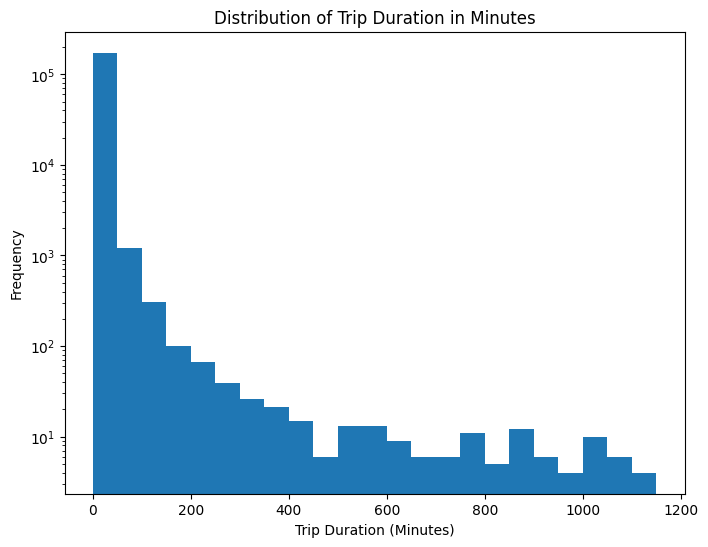

In [3]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 50
bins = np.arange(0, cleaned_bike_df['duration_min'].max(), binsize)

#Plot a histogram for the distrcleaned_bike_dfibution of the trip duration in minutes. 
plt.hist(data = cleaned_bike_df, x= 'duration_min', bins=bins)
plt.title('Distribution of Trip Duration in Minutes')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

## Distribution of Trip Starts by Hour

The distribution of the start hour of the day shows that it's a bimodal distribution, which means there are two obvious peaks in this distribution, one in the morning (around **8:00** to **9:00** AM), and another one in the evening (around **5:00** to **6:00** PM). In general, these are the typical hours for work and school commutes. 

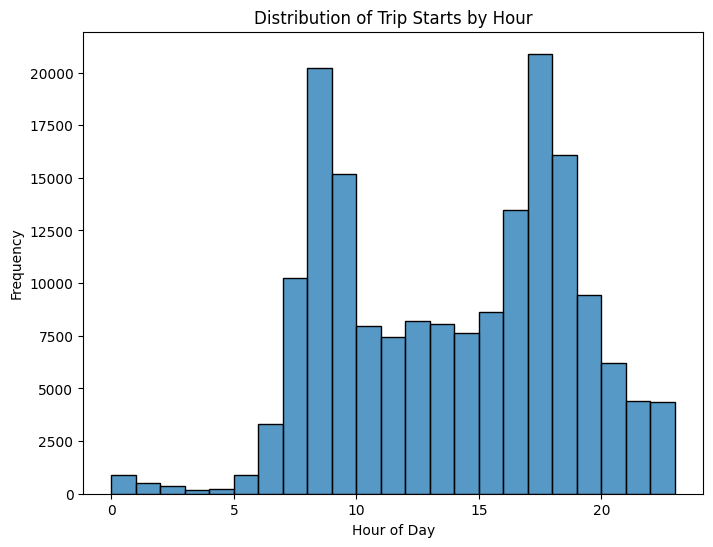

In [4]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 1
bins = np.arange(0, 24, binsize)

#Plot a histogram for the distribution of the trip start hour of the day. 
sns.histplot(data=cleaned_bike_df, x='start_hour', bins=bins)
plt.title('Distribution of Trip Starts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

## Relationship Between Trip Duration and Member Age

In general the majority of trip durations are short and concentrated among members in younger ages between **20s** to **40s** range. In fact, short trips are a common behavior accross all age groups.

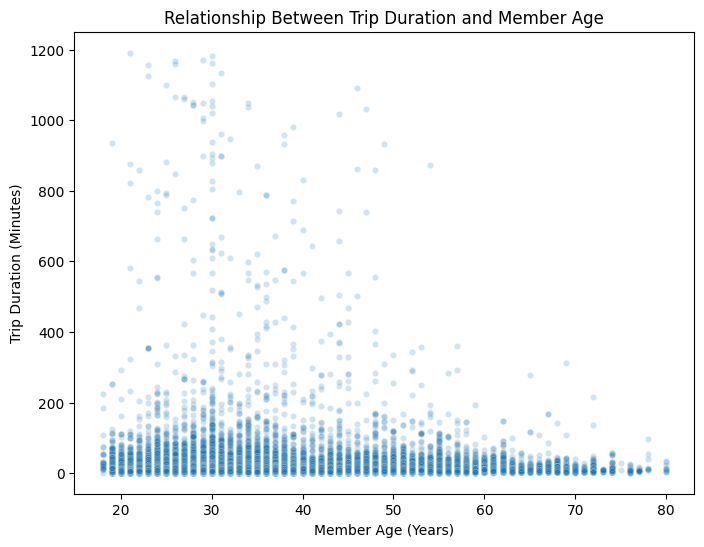

In [5]:
plt.figure(figsize=(8, 6))

#Plot a Scatterplot of trip duration vs. member age.  
sns.scatterplot(data=cleaned_bike_df, x='member_age', y='duration_min',
    alpha=0.2, # Use transparency due to high number of points
    s=20 # Adjust marker size
)
plt.title('Relationship Between Trip Duration and Member Age')
plt.xlabel('Member Age (Years)')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

## User Type Distribution by Member Gender

'Subscribers' user type for all gender categories make a much higher number of trips compared to 'Customers'. On the other hand, the 'Male' gender group have the highest number of trips for both 'Subscriber' and 'Customer' user type, but there is a significant difference between number of trips for 'Subscribers' and 'Customers' of the 'Male' gender category.

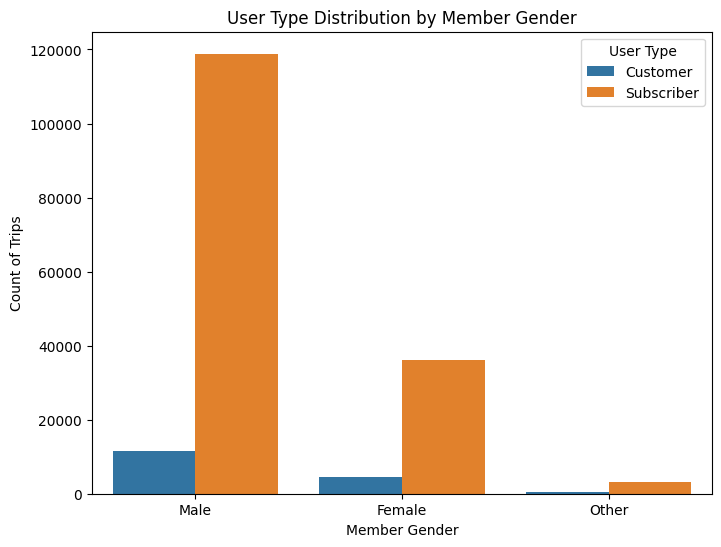

In [6]:
plt.figure(figsize=(8, 6))

# Plot a countplot to visualize the distribution of member genders by user type.
sns.countplot(data=cleaned_bike_df, x='member_gender', hue='user_type',
    order=cleaned_bike_df['member_gender'].value_counts().index # Order by frequency
)
plt.title('User Type Distribution by Member Gender')
plt.xlabel('Member Gender')
plt.ylabel('Count of Trips')
plt.legend(title='User Type')
plt.show()

## Trip Counts by Hour of Day and Day of Week

There are an obvious peak of periods during the weekdays (not weekends), the first period is around **8:00** to **9:00** AM and the second period is around **5:00** to **6:00** PM. In the weekend using this service is spreading throughout the day with a different peak period around **10:00** AM to **3:00** PM. The off-peak hours in all days are starting from **1:00** AM to **4:00** PM.

In [7]:
#Reorder the days of the week.
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cleaned_bike_df['start_day'] = pd.Categorical(cleaned_bike_df['start_day'], \
                                              categories=ordered_days, ordered=True)

In [8]:
#Create a pivot table counting trips by 'start_hour' (rows) and 'start_day' (columns).
heatmap_pivot = cleaned_bike_df.groupby(['start_hour', 'start_day'], observed=False)\
.size().unstack(fill_value=0)

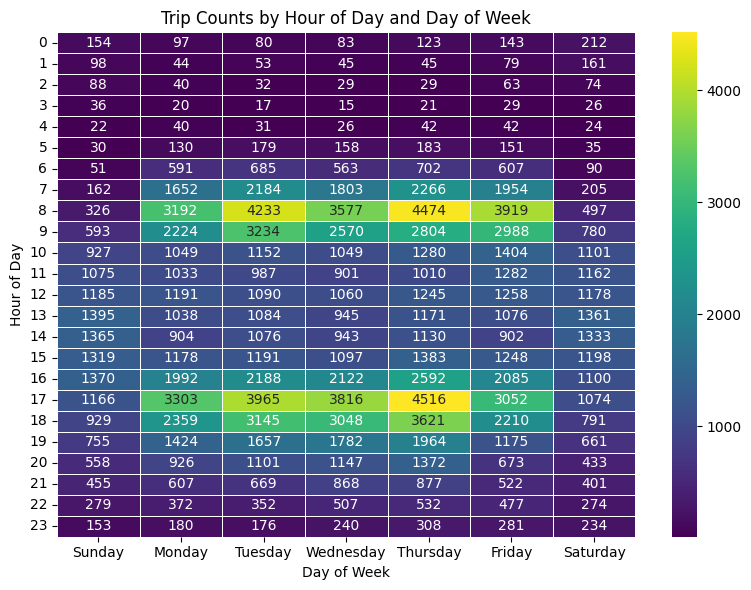

In [9]:
plt.figure(figsize=(8, 6))

#Plot a heatmap to visualize trip frequency patterns by hour and day.
sns.heatmap(
    heatmap_pivot,
    cmap='viridis', # Color map
    annot=True, # Annotate the heatmap with the data values
    fmt='d', # Format annotations as integers
    linewidths=.5 # Add lines between cells
)
plt.title('Trip Counts by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

## Age Distribution by User Type and Gender

The majority of users in all gender and user type categories fall within the age range between **20s** and **40s** years.

<Figure size 1000x700 with 0 Axes>

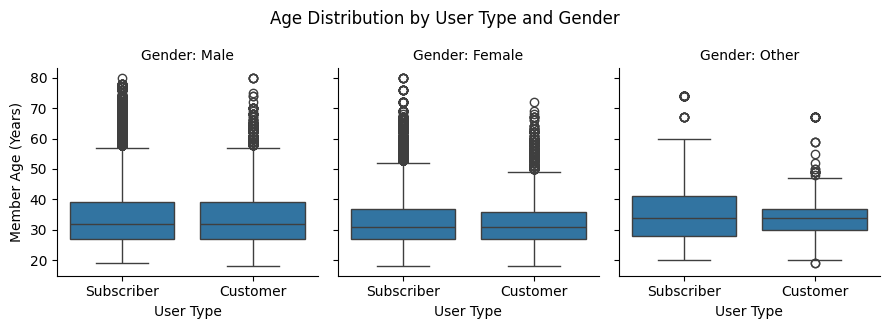

In [10]:
plt.figure(figsize=(10, 7))

#Order both the 'member_gender' and the 'user_type'.
col_order = ['Male', 'Female', 'Other']
user_order = ['Subscriber', 'Customer']

# Create a faceted boxplot to show the age distribution by user type and gender.
g = sns.FacetGrid(data=cleaned_bike_df, col='member_gender', col_order=col_order)
g.map(sns.boxplot, 'user_type','member_age', order=user_order)

g.fig.suptitle('Age Distribution by User Type and Gender', y=1.08)
g.set_axis_labels('User Type', 'Member Age (Years)')
g.set_titles(col_template='Gender: {col_name}')

plt.show()

In [11]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_II_explanatory_ford-gobike-system.ipynb

[NbConvertApp] Converting notebook Part_II_explanatory_ford-gobike-system.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 712193 bytes to Part_II_explanatory_ford-gobike-system.html
